In [1]:
import pandas as pd

In [2]:
waitrose_df = pd.read_json('waitrose.json')

In [3]:
waitrose_df.columns.values

array(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'extended_tweet', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'filter_level', 'lang', 'matching_rules',
       'display_text_range', 'retweeted_status', 'possibly_sensitive',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'extended_entities', 'scopes'],
      dtype=object)

In [4]:
waitrose_df=waitrose_df[~waitrose_df['text'].str.contains('asda|sainsbury|Tesco|Morrisons|Iceland')][['text', 'retweet_count', 'favorite_count']]
waitrose_df

,text,retweet_count,favorite_count
0,RT @HelpThemHelpUs_: Our friends at @Potsandco...,0,0
2,@waitrose the wine you delivered yesterday was...,0,0
3,RT @jlandpartners: This Christmas we want to #...,0,0
4,RT @RebeccaTillett1: @waitrose if the U.K. ach...,0,0
6,@DrJDrooghaag @GeekOnTheLoose @digitalcloudgal...,0,4
...,...,...,...
24792,Agreed the best toast around @waitrose https:/...,0,0
24793,@MissLauraMarcus @waitrose We have cauliflower...,0,0
24795,@MaryRegW @Chisholm4Trail @waitrose @DefraGovU...,0,1
24796,RT @GreenJennyJones: I usually loathe companie...,0,0


In [5]:
pip install text_preprocessing

Note: you may need to restart the kernel to use updated packages.


In [6]:
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/wangsiqi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
preprocess_functions = [to_lower, remove_email, remove_url, remove_punctuation]

In [8]:
import re
def clean_text(text):
    text = re.sub(r'@\w+\s?', '', text)
    text = preprocess_text(text, preprocess_functions)
    text = text.replace('rt', '')
    text = re.sub(r"[0-9]"," ",text)
    return text

In [9]:
waitrose_df['text'] = waitrose_df['text'].apply(clean_text)
waitrose_df

,text,retweet_count,favorite_count
0,our friends at puddings are donating all pro...,0,0
2,the wine you delivered yesterday was off and h...,0,0
3,this christmas we want to givealittlelove wi...,0,0
4,if the uk achieves a trade deal with the us ...,0,0
6,…,0,4
...,...,...,...
24792,agreed the best toast around,0,0
24793,we have cauliflower and lemons blessed,0,0
24795,make that donated to food banks we are just ...,0,1
24796,i usually loathe companies emailing me but t...,0,0


In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
sid = SentimentIntensityAnalyzer()
waitrose_df["senti"] = waitrose_df["text"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([waitrose_df.drop(['senti'], axis=1), waitrose_df['senti'].apply(pd.Series)], axis=1).drop(['neg', 'neu','pos'], axis=1)
df.head()

,text,retweet_count,favorite_count,compound
0,our friends at puddings are donating all pro...,0,0,0.9186
2,the wine you delivered yesterday was off and h...,0,0,-0.7964
3,this christmas we want to givealittlelove wi...,0,0,0.4588
4,if the uk achieves a trade deal with the us ...,0,0,0.2960
6,…,0,4,0.0000


In [12]:
def label_sentiment(compound):
    if compound >= 0.2:
        return 'positive'
    elif compound <= -0.2:
        return 'negative'
    else:
        return 'neutral'
    
df['sentiment'] = df['compound'].apply(label_sentiment)
df

,text,retweet_count,favorite_count,compound,sentiment
0,our friends at puddings are donating all pro...,0,0,0.9186,positive
2,the wine you delivered yesterday was off and h...,0,0,-0.7964,negative
3,this christmas we want to givealittlelove wi...,0,0,0.4588,positive
4,if the uk achieves a trade deal with the us ...,0,0,0.2960,positive
6,…,0,4,0.0000,neutral
...,...,...,...,...,...
24792,agreed the best toast around,0,0,0.7430,positive
24793,we have cauliflower and lemons blessed,0,0,0.5994,positive
24795,make that donated to food banks we are just ...,0,1,0.0000,neutral
24796,i usually loathe companies emailing me but t...,0,0,0.5170,positive


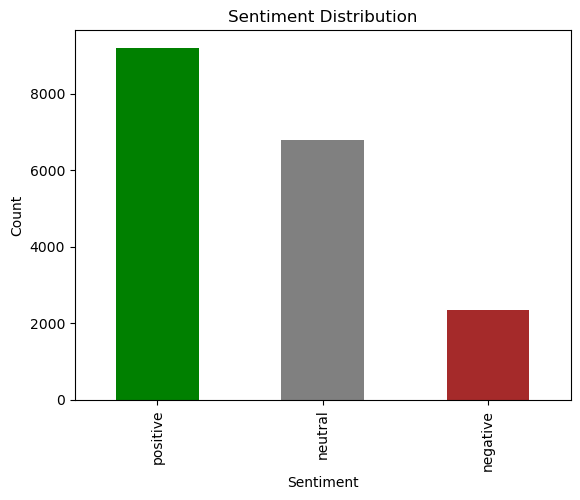

In [13]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'brown'])

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.show()

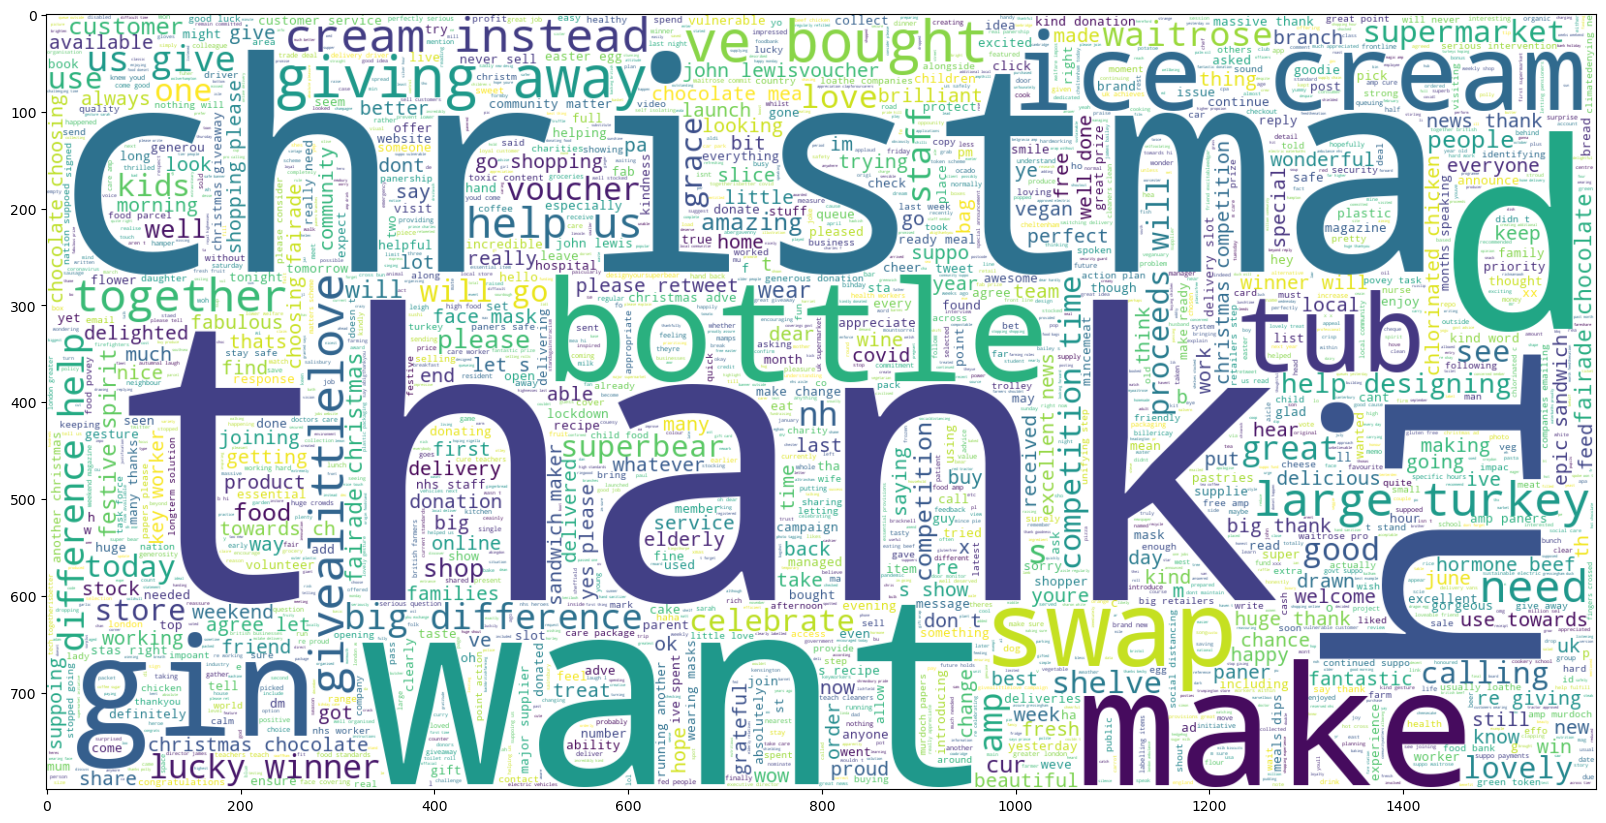

In [14]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

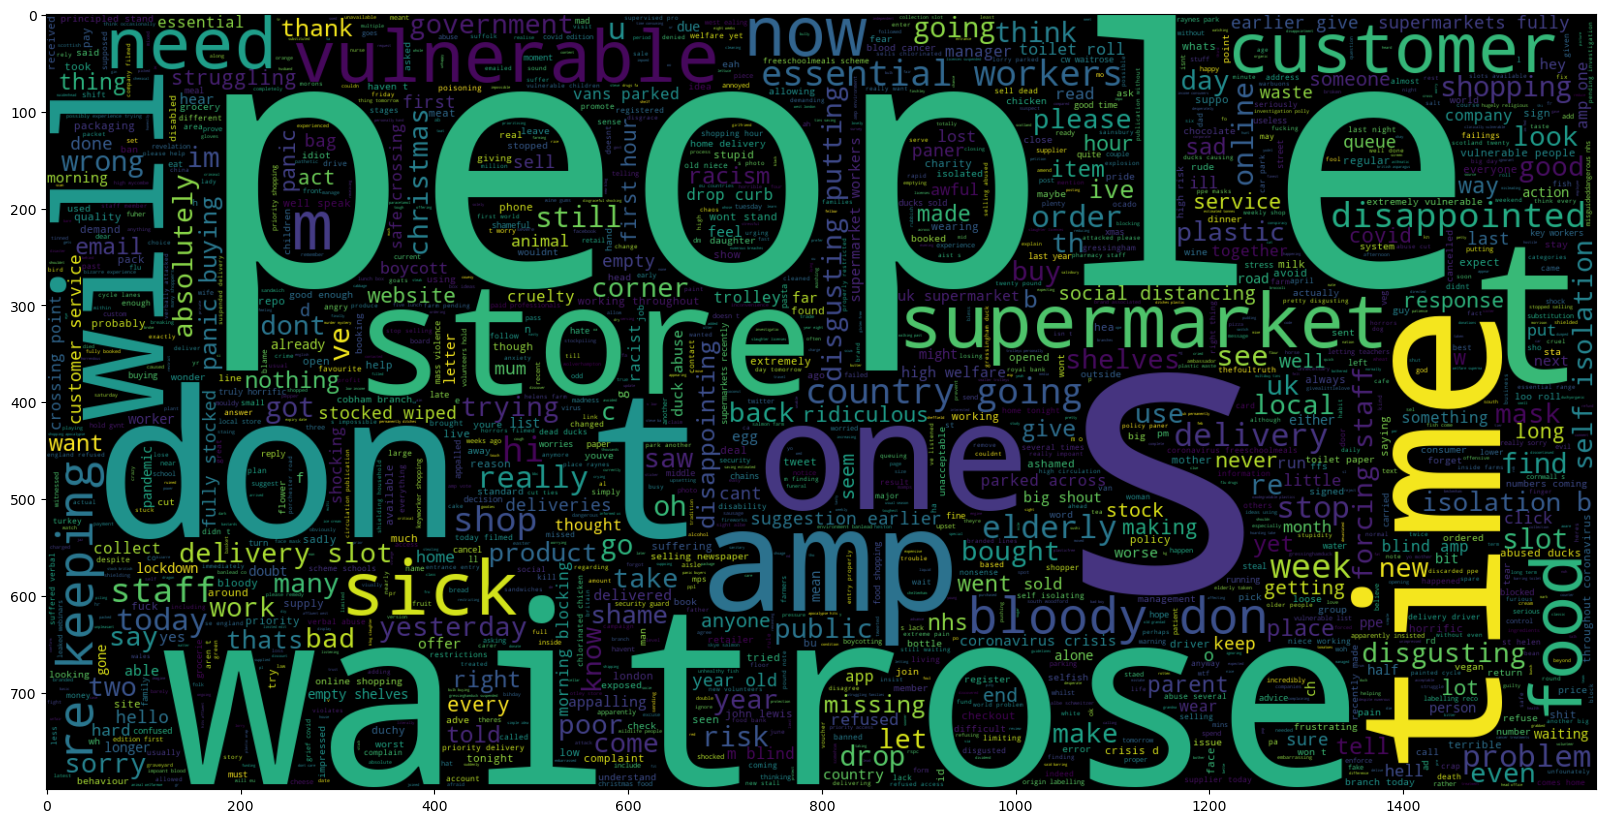

In [15]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

/Users/wangsiqi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


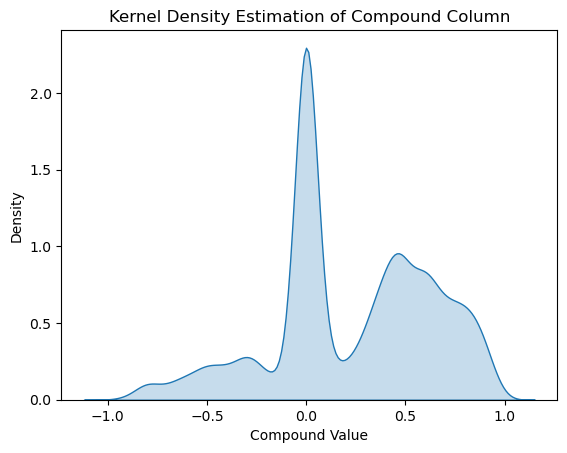

In [16]:
import seaborn as sns
sns.kdeplot(df['compound'], fill=True)

plt.title('Kernel Density Estimation of Compound Column')
plt.xlabel('Compound Value')
plt.ylabel('Density')

plt.show()

In [19]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint

/Users/wangsiqi/anaconda3/lib/python3.11/site-packages/botocore/utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
/Users/wangsiqi/anaconda3/lib/python3.11/site-packages/botocore/httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [21]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

df['processed_text'] = df['text'].apply(preprocess_text)

In [22]:
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

In [24]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=9, passes=10)
pprint(lda_model.print_topics())

[(0,
  '0.045*"£" + 0.033*"away" + 0.032*"use" + 0.032*"giving" + 0.028*"time" + '
  '0.027*"winner" + 0.026*"competition" + 0.021*"lucky" + 0.018*"voucher" + '
  '0.015*"christmas"'),
 (1,
  '0.129*"…" + 0.027*"chocolate" + 0.025*"mask" + 0.025*"please" + 0.023*"’" + '
  '0.022*"fairade" + 0.020*"let" + 0.018*"go" + 0.017*"show" + '
  '0.016*"shopping"'),
 (2,
  '0.079*"’" + 0.044*"like" + 0.037*"hi" + 0.030*"bought" + 0.029*"bottle" + '
  '0.028*"turkey" + 0.027*"gin" + 0.026*"large" + 0.026*"cream" + 0.026*"ice"'),
 (3,
  '0.015*"waitrose" + 0.014*"one" + 0.012*"new" + 0.012*"week" + '
  '0.011*"delivery" + 0.011*"year" + 0.009*"day" + 0.009*"shop" + 0.008*"last" '
  '+ 0.008*"store"'),
 (4,
  '0.062*"’" + 0.016*"people" + 0.014*"nh" + 0.012*"supermarket" + '
  '0.012*"going" + 0.011*"essential" + 0.010*"think" + 0.009*"staff" + '
  '0.008*"‘" + 0.008*"plastic"'),
 (5,
  '0.045*"thank" + 0.030*"thanks" + 0.013*"great" + 0.013*"amp" + '
  '0.012*"staff" + 0.010*"local" + 0.010*"much"

In [25]:
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [76]:
lda_model

In [80]:
dictionary